# k-NN Project 3: `MNIST` Handwritten recognition

We would like to let the machine recognize handwritten digits. `MNIST` is a classical dataset that contains handwritten digits information. Now we apply kNN algrotithm to it. 

`MNIST` is a classical dataset. It can be found from many repository. We will directly load it from `tensorflow.keras`. The instructions of installing `tensorflow` can be found at [here](https://www.tensorflow.org/install).

## Dataset description
Every digit is stored as a $28\times28$ picture. This is a $28\times28$ matrix. Every entry represents a gray value of the corresponding pixel, whose value is from 0 to 255. The label of each matrix is the digit it represents. Note that the dataset provided is already splitted into a training set and a test set.

In [2]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Let us play with these data first. 

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>


From these information we can see that the training set contains 60000 digits and the test set contains 10000 digits. Each digit is represented by a $28\times28$ numpy array. Let us load one and display the digit by `matplotlib.pyplot.imshow`.

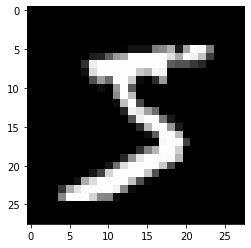

In [4]:
digit = X_train[0]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap='gray')

This image seems to be a `5`. We could double check our guess by looking at the label. The following shows that it is really a `5`.

In [5]:
y_train[0]

5

Now we need to reshape these digits from $28\times28$ numpy arraies to $784$ numpy arraies. Similar to previous examples, we will also normalize the dataset.

In [6]:
from assests.codes.knn import encodeNorm

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

X_train_norm, parameters = encodeNorm(X_train)
X_test_norm, _ = encodeNorm(X_test, parameters=parameters)


## Apply k-NN
Like the previous two examples, we now try to apply the k-NN algorithm to classify these handwritten digits. This time our codes and `sklearn` are more different. The main issue is that our codes don't have any optimizations and the runtime is super slow. `MNIST` is a bigger dataset comparing to the previous two, so it takes a long time to run our codes.

Although we won't improve our codes to make it faster at the current stage, we will modify it a little bit to make the wait feels better.

`tqdm` is package to show progress bar. Every time if you want to use a `for` loop to go through something `X`, you may wrap `tqdm` around `X` and this can show the progress of the loop and how much estimated time left. 

To make the sample faster, we will only run the code over the first 10 examples. 


In [7]:
from assests.codes.knn import classify_kNN
from tqdm import tqdm
import numpy as np

n_neighbors = 10
N_sample = 10
X_test_sample = X_test_norm[0:N_sample]
y_test_sample = y_test[0:N_sample]
y_pred = np.array([classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
                   for row in tqdm(X_test_sample)])

acc = np.mean(y_pred == y_test_sample)
print(acc)

100%|██████████| 10/10 [00:03<00:00,  3.17it/s]

1.0


Now let us try to apply `sklearn` package. Note that we could run the code over the whole test set (which contains 10000 digits) and the speed is much faster comparing to our codes. To save time we won't grid search `k` here. The code is the same anyway.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

steps = [('scaler', MinMaxScaler()),
         ('knn', KNeighborsClassifier(n_neighbors, weights="uniform",
                                      metric="euclidean", algorithm='brute'))]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_pipe = pipe.predict(X_test)
print(accuracy_score(y_pipe, y_test))

0.9664
